# Analysis of Yelp Business Intelligence Data

We will analyze a subset of Yelp's business, reviews and user data. This dataset comes to us from Kaggle although we have taken steps to pull this data into a publis s3 bucket: s3://sta9760-yelpdataset/yelp-light/*business.json


# Installation and Initial Setup

Begin by installing the necessary libraries that you may need to conduct your analysis. 
At the very least, you must install pandas and matplotlib

In [1]:
sc.list_packages()
sc.install_pypi_package("pandas==1.0.3")
sc.install_pypi_package("matplotlib==3.2.1")
sc.install_pypi_package("seaborn==0.10.0")

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
5,application_1588534586649_0006,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Package                    Version
-------------------------- -------
beautifulsoup4             4.8.1
boto                       2.49.0
jmespath                   0.9.4
lxml                       4.4.2
mysqlclient                1.4.6
nltk                       3.4.5
nose                       1.3.4
numpy                      1.14.5
pip                        20.1
py-dateutil                2.2
python36-sagemaker-pyspark 1.2.6
pytz                       2019.3
PyYAML                     3.11
setuptools                 46.1.3
six                        1.13.0
soupsieve                  1.9.5
wheel                      0.34.2
windmill                   1.6

  Using cached pandas-1.0.3-cp36-cp36m-manylinux1_x86_64.whl (10.0 MB)
  Using cached python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)

  Using cached matplotlib-3.2.1-cp36-cp36m-manylinux1_x86_64.whl (12.4 MB)
  Using cached pyparsing-2.4.7-py2.py3-none-any.whl (67 kB)
  Using cached kiwisolver-1.2.0-cp36-cp36m-manylinux1_x86_64.

# Importing 

Now, import the installed packages from the previous block below.

# Loading Data


We are finally ready to load data. Using spark load the data from S3 into a dataframe object that we can manipulate further down in our analysis.

In [2]:
df = spark.read.json('s3://admincreated/yelp_academic_dataset_business.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

# Overview of Data

Display the number of rows and columns in our dataset.

In [3]:
print(f'Total Columns: {len(df.dtypes)}')
print(f'Total Rows: {df.count():,}')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 14
Total Rows: 209,393

Display the DataFrame schema below.

In [4]:
df.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

Display the first 5 rows with the following columns:
business_id
name
city
state
categories

In [5]:
df.select('business_id','name','city','state','categories').show(5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+---------------+-----+--------------------+
|         business_id|                name|           city|state|          categories|
+--------------------+--------------------+---------------+-----+--------------------+
|f9NumwFMBDn751xgF...|The Range At Lake...|      Cornelius|   NC|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|   Carlos Santo, NMD|     Scottsdale|   AZ|Health & Medical,...|
|XNoUzKckATkOD1hP6...|             Felinus|       Montreal|   QC|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Nevada House of Hose|North Las Vegas|   NV|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|USE MY GUY SERVIC...|           Mesa|   AZ|Home Services, Pl...|
+--------------------+--------------------+---------------+-----+--------------------+
only showing top 5 rows

# Analyzing Categories

Let's now answer this question: how many unique categories are represented in this dataset?

Essentially, we have the categories per business as a list - this is useful to quickly see what each business might be represented as but it is difficult to easily answer questions such as:
 - How many businesses are categorized as Active Life, for instance
 - What are the top 20 most popular categories available?

## Association Table¶

We need to "break out" these categories from the business ids? One common approach to take is to build an association table mapping a single business id multiple times to each distinct category.

In [ ]:
#What are the top 20 most popular categories available?
#df4 = df.select('stars','categories').orderBy(df["stars"].desc())
#df4.show()

Implement the code necessary to derive the table described from your original yelp dataframe.

In [6]:
df1 = df.select('business_id','categories')
df1.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+
|         business_id|          categories|
+--------------------+--------------------+
|f9NumwFMBDn751xgF...|Active Life, Gun/...|
|Yzvjg0SayhoZgCljU...|Health & Medical,...|
|XNoUzKckATkOD1hP6...|Pets, Pet Service...|
|6OAZjbxqM5ol29BuH...|Hardware Stores, ...|
|51M2Kk903DFYI6gnB...|Home Services, Pl...|
|cKyLV5oWZJ2NudWgq...|Auto Repair, Auto...|
|oiAlXZPIFm2nBCt0D...|Dry Cleaning & La...|
|ScYkbYNkDgCneBrD9...|Auto Repair, Oil ...|
|pQeaRpvuhoEqudo3u...|Ethnic Food, Food...|
|EosRKXIGeSWFYWwpk...|Martial Arts, Gym...|
|MbZMmwo-eL0Jnm_Yb...|Contractors, Land...|
|7Dv4_HAxsxvadEsT5...|Automotive, Auto ...|
|M_guz7Dj7hX0evS67...|Desserts, Food, I...|
|JjJs3o60uQCfctDjs...|Contractors, Home...|
|kOICO53wbOiOJcKuC...|Beauty & Spas, Ta...|
|rqcOZePlVvJP9Etzl...|Local Services, S...|
|uZuh51lXu7tsrC8RA...|Shopping, Shoe St...|
|nIEhsGbw0vJuYl05b...|Event Planning & ...|
|edQoeeBFUTYGwnUSE...|Auto Customizatio...|
|Vwo64kNYDjKi98gUU...|Weight Los

Display the first 5 rows of your association table below.

In [7]:
from pyspark.sql.functions import split, explode
df2 = df1.withColumn('categories', explode(split('categories',', '))).select('business_id','categories')
df2 = df2.withColumnRenamed("categories","category")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

### Show the first 5 rows 

In [8]:
df2.show(n=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+----------------+
|         business_id|        category|
+--------------------+----------------+
|f9NumwFMBDn751xgF...|     Active Life|
|f9NumwFMBDn751xgF...|Gun/Rifle Ranges|
|f9NumwFMBDn751xgF...|     Guns & Ammo|
|f9NumwFMBDn751xgF...|        Shopping|
|Yzvjg0SayhoZgCljU...|Health & Medical|
+--------------------+----------------+
only showing top 5 rows

# Total Unique Categories

What is the total number of unique categories available? - 1336

Finally, we are ready to answer the question: what is the total number of unique categories available?

In [9]:
#df1.groupBy('categories').count().show()
df3 = df2.select("category").distinct()
df3.count()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

1336

# Top Categories By Business

So now, let's unroll our distinct count a bit and display the per count value of businesses per category.

In [10]:
df2.groupBy('category').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------------------+-----+
|           category|count|
+-------------------+-----+
|     Paddleboarding|   36|
|     Dermatologists|  341|
|   Historical Tours|   54|
|   Hot Air Balloons|   21|
|Mobile Home Dealers|   16|
|       Aerial Tours|   28|
|      Skating Rinks|  104|
|  Signature Cuisine|    1|
|             Fondue|   54|
|      Data Recovery|  195|
|  Pet Waste Removal|   34|
|      Videographers|  169|
|    Pet Photography|   49|
|        Boat Repair|  100|
|            Beaches|   74|
|       Contract Law|   13|
|        Hobby Shops|  828|
|           Day Spas| 2880|
|              Reiki|  312|
|Private Jet Charter|   10|
+-------------------+-----+
only showing top 20 rows

### Bar Chart of Top Categories

With this data available, let us now build a barchart of the top 20 categories.

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

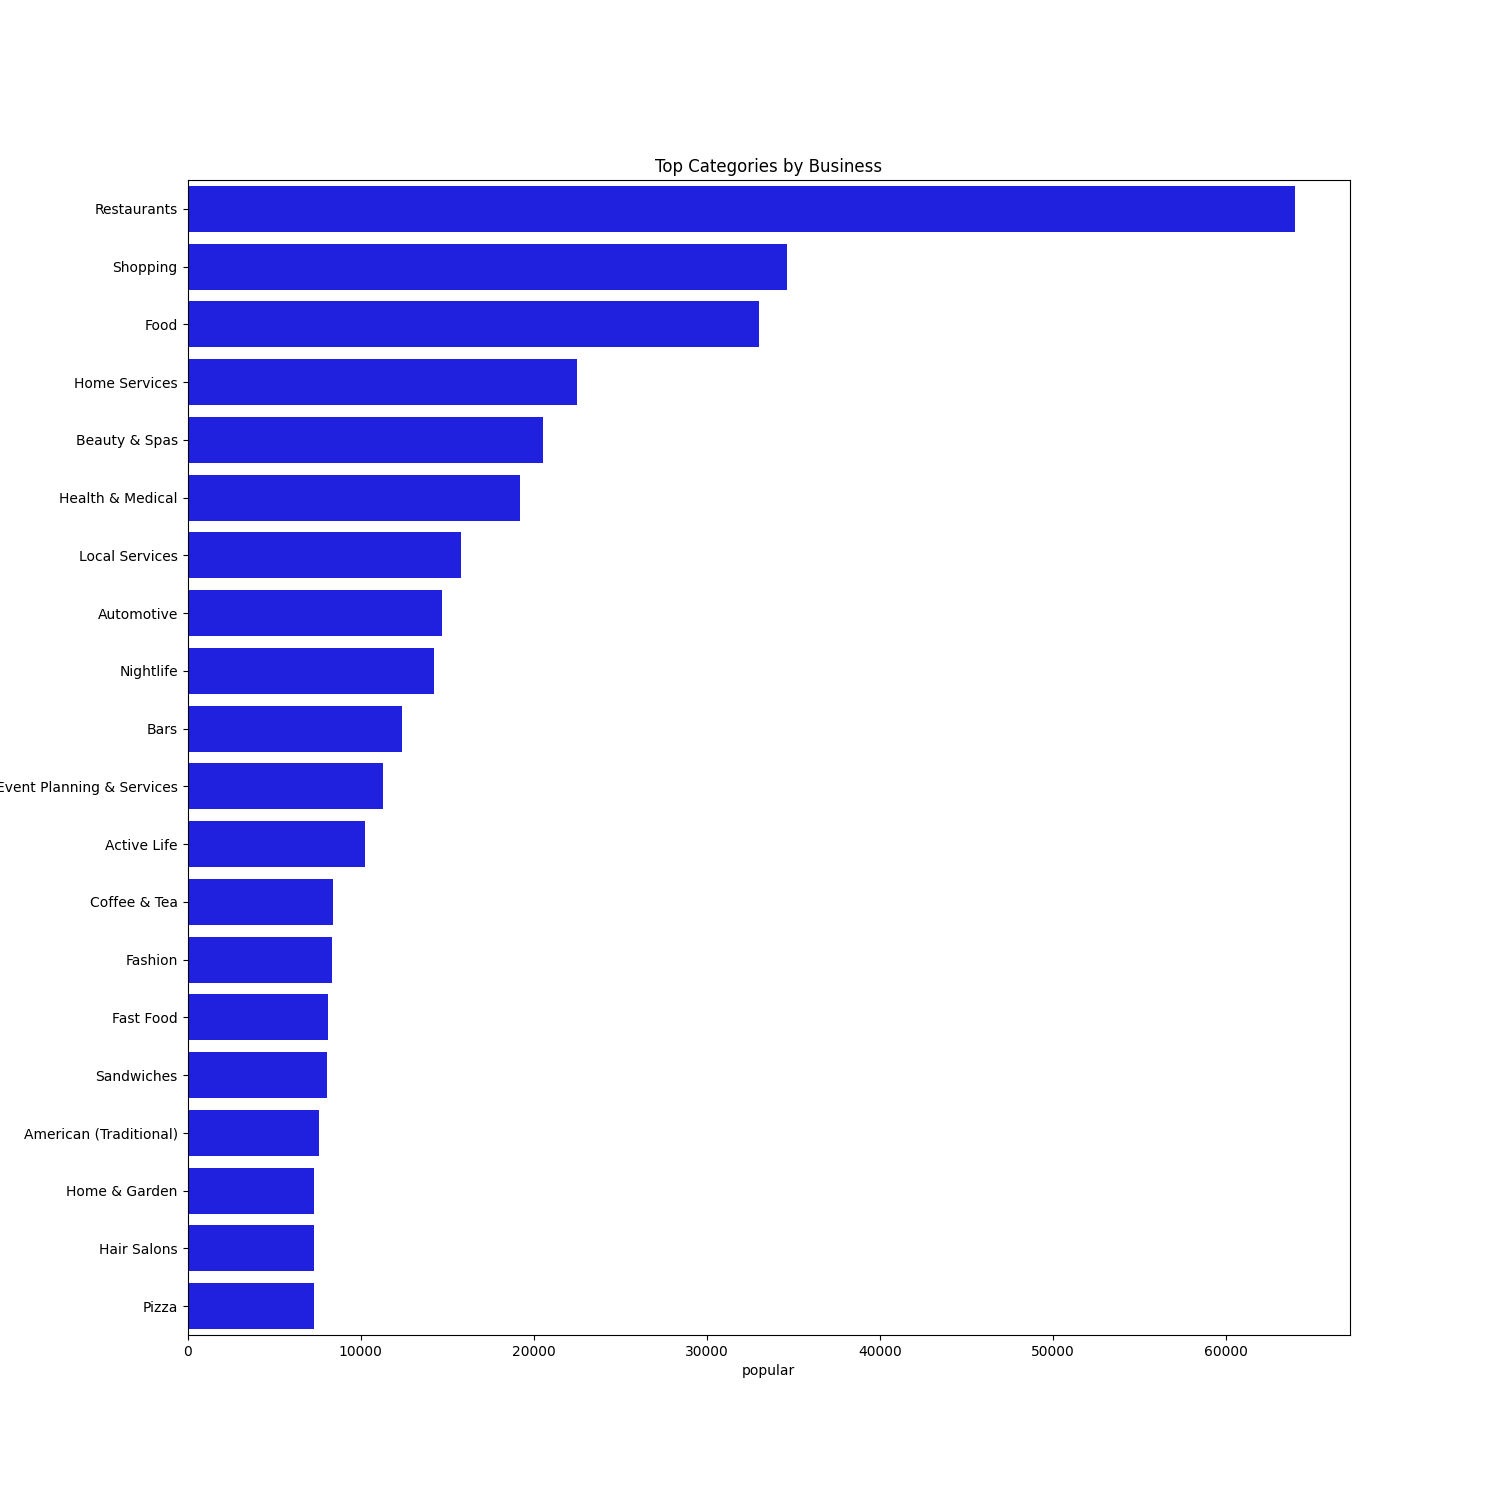

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn
df2.createOrReplaceTempView('top_review')
df_top = spark.sql("select `category`, count(`category`) as popular from top_review GROUP by `category` order by popular desc limit 20")
df_top1 = df_top.toPandas()
fig, ax= plt.subplots(figsize = (15,15))
plot1 = seaborn.barplot(x = 'popular', y = 'category', data = df_top1, ax=ax, color ="blue")
ax.set_title('Top Categories by Business')
#pdf = df1.groupBy('categories')
#pdf1 = pdf.head(20).plot.bar(title='Top Categories by Business')
#pdf1.set_xlabel("categories")
#pdf1.set_ylabel("count")
%matplot plt

In [ ]:
#df.groupBy('categories').count().orderBy('count', ascending=False).show(5)

In [ ]:
#x.plot(kind=‘barh’)

# Do Yelp Reviews Skew Negative?

## Loading User Data

Begin by loading the user data set from S3 and printing schema to determine what data is available.

In [16]:
dfr = spark.read.json('s3://admincreated/yelp_academic_dataset_review.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [17]:
print(f'Total Columns: {len(dfr.dtypes)}')
print(f'Total Rows: {dfr.count():,}')
dfr.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 9
Total Rows: 8,021,122
root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)

Let's begin by listing the business_id and stars columns together for the user reviews data.

In [18]:
dfr.select('business_id','stars').show(n=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+-----+
|         business_id|stars|
+--------------------+-----+
|-MhfebM0QIsKt87iD...|  2.0|
|lbrU8StCq3yDfr-QM...|  1.0|
|HQl28KMwrEKHqhFrr...|  5.0|
|5JxlZaqCnk1MnbgRi...|  1.0|
|IS4cv902ykd8wj1TR...|  4.0|
+--------------------+-----+
only showing top 5 rows

### Display average stars per business as accumulated by users

Now, let's aggregate along the stars column to get a resultant dataframe that displays average stars per business as accumulated by users who took the time to submit a written review.

In [19]:
dfr.createOrReplaceTempView('review')
dfr1 = spark.sql('select business_id, avg(stars) as avg_stars from review group by business_id')
dfr1.show(n=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------------+
|         business_id|         avg_stars|
+--------------------+------------------+
|VHsNB3pdGVcRgs6C3...| 3.411764705882353|
|RMjCnixEY5i12Ciqn...|3.5316455696202533|
|vQGZjrDiDBuznOkUe...| 4.454545454545454|
|vyu1WGlnHGv2Z2MVE...|               5.0|
|r-W1HPIZ3V6S2DaXh...| 4.852459016393443|
+--------------------+------------------+
only showing top 5 rows

Now the fun part - let's join our two dataframes (reviews and business data) by business_id.

In [20]:
df5 = df.select('business_id','name','city','state','stars')
df6 = df5.join(dfr1, on="business_id", how="inner")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [21]:
#dfskew = df8.withColumn("skew",(df8['avg(stars)'] - df8['stars']) / df8['stars'])
df6.show(n=5)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-----------+-----+-----+------------------+
|         business_id|                name|       city|state|stars|         avg_stars|
+--------------------+--------------------+-----------+-----+-----+------------------+
|--9e1ONYQuAa-CB_R...|Delmonico Steakhouse|  Las Vegas|   NV|  4.0|  4.11784140969163|
|-6c_bJblLXUwoWfmY...|Neo-Paws Internat...|    Toronto|   ON|  2.5|2.3333333333333335|
|-ElDqujEn1u64ynQr...| McFarling Law Group|  Las Vegas|   NV|  4.5|             4.375|
|-Gh9a15ijNii-8rnp...|Volvo of Mississauga|Mississauga|   ON|  3.5|3.3333333333333335|
|-I06hkMFrX0KBqu61...|Andre Agassi Coll...|  Las Vegas|   NV|  5.0|               5.0|
+--------------------+--------------------+-----------+-----+-----+------------------+
only showing top 5 rows

Compute a new dataframe that calculates what we will call the skew (for lack of a better word) between the avg stars accumulated from written reviews and the actual star rating of a business (ie: the average of stars given by reviewers who wrote an actual review and reviewers who just provided a star rating).

The formula you can use is something like:
    
(row['avg(stars)'] - row['stars']) / row['stars']

If the skew is negative, we can interpret that to be: reviewers who left a written response were more dissatisfied than normal. If skew is positive, we can interpret that to be: reviewers who left a written response were more satisfied than normal.

In [22]:
dfskew = df6.withColumn("skew",(df6['avg_stars'] - df6['stars']) / df6['stars'])
dfskew.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+--------------------+-------------+-----+-----+------------------+--------------------+
|         business_id|                name|         city|state|stars|         avg_stars|                skew|
+--------------------+--------------------+-------------+-----+-----+------------------+--------------------+
|--9e1ONYQuAa-CB_R...|Delmonico Steakhouse|    Las Vegas|   NV|  4.0|  4.11784140969163|0.029460352422907565|
|-6c_bJblLXUwoWfmY...|Neo-Paws Internat...|      Toronto|   ON|  2.5|2.3333333333333335|-0.06666666666666661|
|-ElDqujEn1u64ynQr...| McFarling Law Group|    Las Vegas|   NV|  4.5|             4.375|-0.02777777777777...|
|-Gh9a15ijNii-8rnp...|Volvo of Mississauga|  Mississauga|   ON|  3.5|3.3333333333333335|-0.04761904761904...|
|-I06hkMFrX0KBqu61...|Andre Agassi Coll...|    Las Vegas|   NV|  5.0|               5.0|                 0.0|
|-Qb6U1MotJfpt6OU_...|Woof Wise Dog Tra...|    Richfield|   OH|  5.0|               5.0|                 0.0|
|-RRnldwSq

And finally, graph it!

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

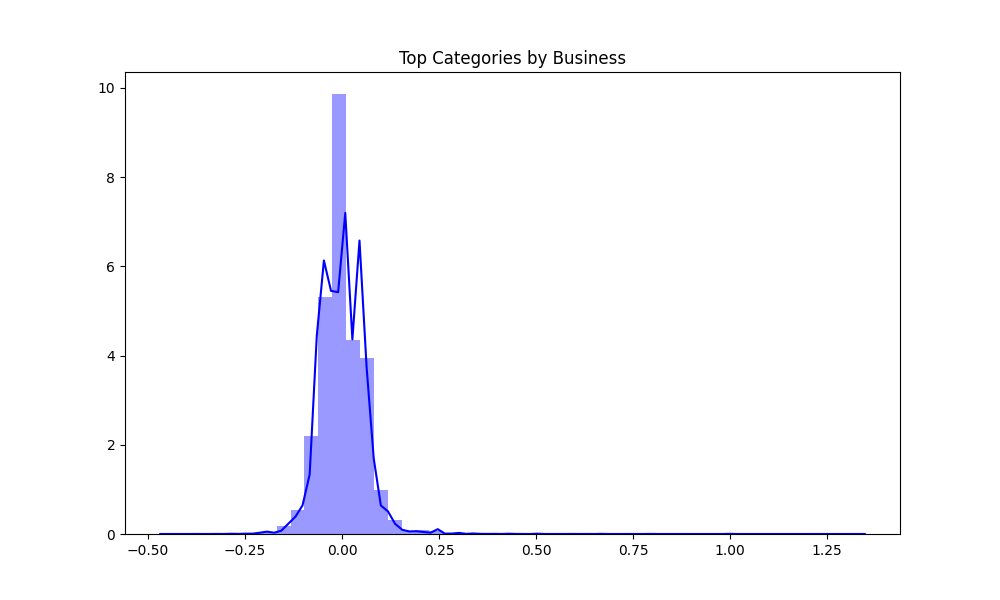

In [23]:
import seaborn
fig, ax = plt.subplots(figsize = (10,6))
seaborn.distplot(dfskew.select('skew').toPandas(), ax = ax , color = 'blue')
ax.set_title('Top Categories by Business')
%matplot plt

So, do Yelp (written) Reviews skew negative? Does this analysis actually prove anything? Expound on implications / interpretations of this graph.

Answer : Yelp Reviews is not skewed negatively. we know that the top five businesses in Yelp are restuarant,shopping, food, home service and beauty. Customers are generally feel okay about the services. 

In [24]:
dfu = spark.read.json('s3://admincreated/yelp_academic_dataset_user.json')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [25]:
dfu.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)

Joining Review nad User dataset 

In [26]:
dfn1 = dfu.select('user_id','review_count')
dfn = dfr.select('user_id','cool','funny','useful')
#df6 = dfn.join(dfn1,how="outer").show()
dfnn = dfn1.join(dfn,on='user_id',how="left")
dfnn.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+--------------------+------------+----+-----+------+
|             user_id|review_count|cool|funny|useful|
+--------------------+------------+----+-----+------+
|-0Ji0nOyFe-4yo8BK...|          55|   0|    1|     0|
|-0XPr1ilUAfp-yIXZ...|           3|   0|    3|     1|
|-1KKYzibGPyUX-Mwk...|         163|   0|    0|     1|
|-1zQA2f_syMAdA04P...|           7|   0|    0|     2|
|-1zQA2f_syMAdA04P...|           7|   0|    0|     0|
|-1zQA2f_syMAdA04P...|           7|   0|    0|     0|
|-1zQA2f_syMAdA04P...|           7|   0|    0|     0|
|-1zQA2f_syMAdA04P...|           7|   0|    3|     5|
|-2G_a0eur5RTmI-vc...|          11|   0|    0|     0|
|-2G_a0eur5RTmI-vc...|          11|   0|    0|     0|
|-2G_a0eur5RTmI-vc...|          11|   0|    0|     0|
|-2G_a0eur5RTmI-vc...|          11|   0|    0|     0|
|-2G_a0eur5RTmI-vc...|          11|   0|    0|     0|
|-2G_a0eur5RTmI-vc...|          11|   0|    0|     0|
|-2Pb5d2WBPtbyGT_b...|           7|   0|    0|     0|
|-2gEBUGicw7HtLX0K...|      

In [ ]:
fig, ax = plt.subplots(30,20)
seaborn.distplot(dfnn.select('review_count').toPandas(), ax = ax , color = 'blue')
ax.set_title('Number of Review ')
%matplot plt

In [ ]:
#The distribution of the reviews is negatively skewed. 